<a href="https://colab.research.google.com/github/akhan126/Github-and-Jupyter-setup/blob/main/Copy_of_06_Binary_Logistic_Regression_HBAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, we will analyze the HBAT.sav dataset to determine if there are differences in the perception of HBAT performance (variables X6 – X18) between customers in the USA/North America and those in the rest of the world (X4). Additionally, we will use the HBAT_SPLITS.sav dataset, which divides the data into a training group and a holdout group through random selection for cross-validation. To get started, first upload the 'HBAT.sav' and 'HBAT_SPLITS.sav' datasets to the Files section on the left sidebar.

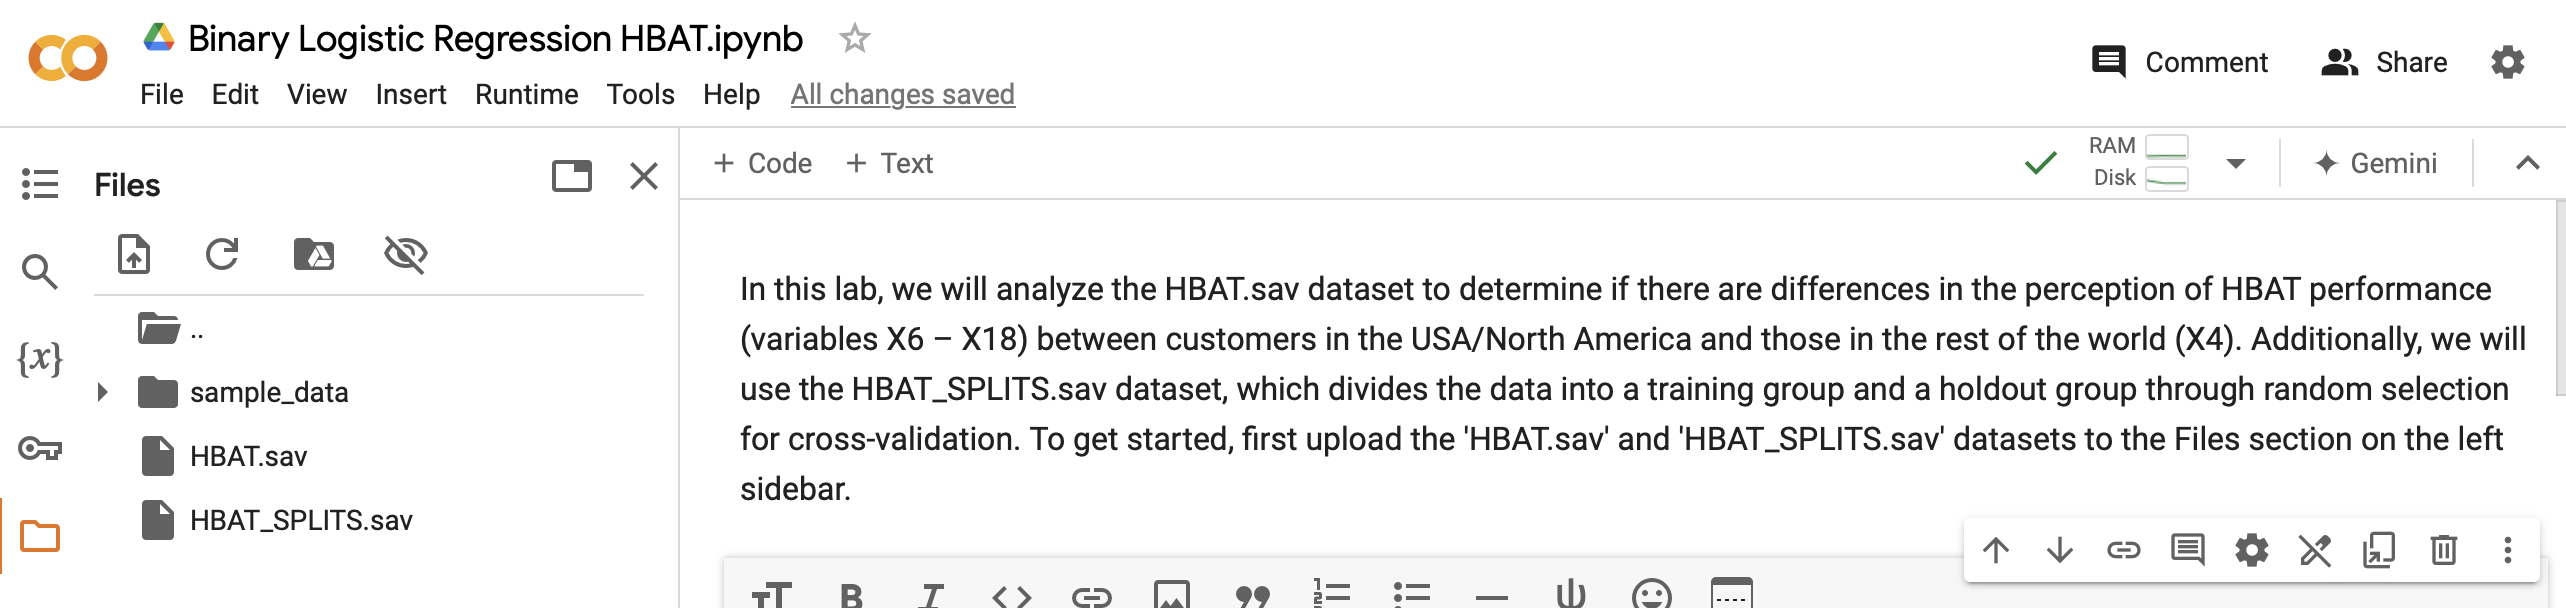

In [ ]:
# Install the pyreadstat package to read the .sav files.
!pip install pyreadstat
import pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.8 MB/s eta 0:00:00


In [ ]:
file_path = '/content/HBAT.sav'
# Read the .sav file
# df will contain the data as a pandas DataFrame.
# meta will contain metadata about the file, such as variable labels, value labels, and more.
hbat_df, hbat_meta = pyreadstat.read_sav(file_path)
# Display the first few rows of the dataframe
hbat_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1.0,2.0,0.0,1.0,1.0,1.0,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1.0
1,2.0,3.0,1.0,0.0,0.0,0.0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0.0
2,3.0,3.0,0.0,1.0,1.0,1.0,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1.0
3,4.0,1.0,1.0,1.0,1.0,0.0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0.0
4,5.0,2.0,0.0,1.0,0.0,1.0,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0.0


# STEP 1: Check Assumptions
1.	**Binary Outcome**

We are interested in the Region (X4) variable as our outcome. If we look at the HBAT dataset, we can see that our data is correctly coded into binary categories (0 = USA/North America & 1 = Rest of the World).


In [ ]:
# Check the unique values in X4 to see how they are coded
print(hbat_df['x4'].unique())

[1. 0.]


2.	**Sample Size**

For our initial model we are interested in using all performance perception variables (X6 – X18). This means we will start with 13 predictor variables. Ideally, we would have at least 130 observations in each group. In the HBAT dataset we have 100 observations, we will keep this in mind as we continue.  Because this is a cleaned dataset intended for learning purposes, we can continue in this situation.


In [ ]:
# Check the total number of observations
total_observations = hbat_df.shape[0]
print(f"Total observations in the dataset: {total_observations}")

# Check the number of observations in each group (0 = USA/North America, 1 = Rest of the World)
usa_count = hbat_df[hbat_df['x4'] == 0].shape[0]
row_count = hbat_df[hbat_df['x4'] == 1].shape[0]

print(f"Number of observations in USA/North America: {usa_count}")
print(f"Number of observations in Rest of the World: {row_count}")


Total observations in the dataset: 100
Number of observations in USA/North America: 39
Number of observations in Rest of the World: 61


3.	**Independence of Observations**

We will be checking multicollinearity, there will be a violation of independence if there is high correlation among the predictors. We will use VIF (variance inflation factor) in Python. This will allow us to see if there are variables with high (>5) VIF (indicating high multicollinearity); meaning those variables explain much of the outcome variable resulting in little variance explained by other predictor variables. Tolerance provides us with the percent of variance in the predictor that cannot be accounted for by other predictors. VIF = 1/tolerance.


In [ ]:
#Load Necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Prepare our Data
predictors = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
X = hbat_df[predictors]
# Define the dependent variable (Region)
y = hbat_df['x4']

In [ ]:
# Add a constant term for the intercept
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()

In [ ]:
# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

In [ ]:
# Extract coefficients, standard errors, t-values, and p-values
coefficients = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues
betas = model.params / std_errors  # This isn't exactly standardized coefficients but a similar concept


# Combine the results into a DataFrame
results = pd.DataFrame({
    "Variable": vif_data["Variable"],  # Aligns with VIF data
    "Unstandardized Coefficients (B)": coefficients.values,
    "Std. Error": std_errors.values,
    "Standardized Coefficients (Beta)": betas.values,
    "t": t_values.values,
    "Sig. (p-value)": p_values.values,
    "Tolerance": vif_data["Tolerance"].values,
    "VIF": vif_data["VIF"].values
})

# Reset index to clean it up
results = results.reset_index(drop=True)

# Display the DataFrame
results


,Variable,Unstandardized Coefficients (B),Std. Error,Standardized Coefficients (Beta),t,Sig. (p-value),Tolerance,VIF
0,const,0.292041,0.620701,0.470501,0.470501,0.639188,0.002556,391.311398
1,x6,-0.058362,0.029202,-1.998579,-1.998579,0.048813,0.598196,1.671693
2,x7,-0.259533,0.075632,-3.431505,-3.431505,0.000925,0.354288,2.822562
3,x8,-0.003008,0.035971,-0.083633,-0.083633,0.933543,0.328149,3.047401
4,x9,0.001843,0.057400,0.032105,0.032105,0.974463,0.206708,4.837740
5,x10,-0.035485,0.034810,-1.019399,-1.019399,0.310873,0.646237,1.547421
6,x11,-0.029101,0.147758,-0.196952,-0.196952,0.844330,0.026331,37.978425
7,x12,0.259495,0.056214,4.616248,4.616248,0.000014,0.273702,3.653611
8,x13,0.050628,0.026706,1.895730,1.895730,0.061354,0.584105,1.712022
9,x14,-0.013967,0.069550,-0.200819,-0.200819,0.841314,0.305959,3.268413


There are three instances of multicollinearity: Product Line (VIF=37.98), Price Flexibility (VIF = 33.33), and Delivery Speed (VIF=44.00). Each of these values is much larger than our threshold for VIF of 5. This means that they may be explaining the same relationship with our outcome variable of Customer Region (0= USA/North America, 1 = Outside of North America). To account for this multicollinearity, we would typically remove a predictor that we feel related the least to our research question, then rerun the previous procedures. Hair, Joseph F. etc. (2018) believe that while logistic regression is affected by multicollinearity, it is not expected to be a serious problem in this model estimation or interpretation.

4.	**Linearity Between Predictors and Logits**

We will be using the Box-Tidwell procedure to test nonlinearity. To do this we will create an interaction term that is the product of the independent variable and its log value (independent variable * log (independent variable)). Then test for the significance of the interaction term when
added to the model. A non-significant interaction indicates a linearity between the predictor variable and the logits.


In [ ]:
# Create interaction terms for each predictor
interaction_terms = pd.DataFrame()

for predictor in predictors:
    interaction_terms[predictor + '_interaction'] = X[predictor] * np.log(X[predictor].replace(0, 0.01))

# Combine the original predictors with the interaction terms
X_interaction = pd.concat([X, interaction_terms], axis=1)

# Drop any rows with NaN values resulting from log(0)
X_interaction = X_interaction.dropna()
y = y[X_interaction.index]  # Align y with X_interaction

In [ ]:
# Fit the logistic regression model with interaction terms
model = sm.Logit(y, X_interaction).fit(maxiter=100, method='bfgs', cov_type='HC0')
# method='bfgs': The 'bfgs' (Broyden–Fletcher–Goldfarb–Shanno) algorithm is a quasi-Newton method
# often more robust to near-singularity than the default Newton-Raphson method.

# cov_type='HC0': This uses a heteroscedasticity-consistent covariance matrix estimator,
# which can be helpful when dealing with potential multicollinearity issues.

# Print the summary to check the significance of interaction terms
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 88
         Gradient evaluations: 88
                           Logit Regression Results                           
Dep. Variable:                     x4   No. Observations:                  100
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                           26
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        19:22:15   Log-Likelihood:            -3.2401e-05
converged:                       True   LL-Null:                       -66.875
Covariance Type:                  HC0   LLR p-value:                 1.835e-16
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.4686  

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Looking at the “P>|z|” column, we see none of the interactions are significant when using a 0.05 threshold. We have met the assumption of linearity between the predictor variable and the logits. If linearity was violated we would have to transform the variable that indicated non-linearity. Here are some examples of transformations that can be used. These visuals were taken from Professor Zhushan Li's GLM lecture slides.

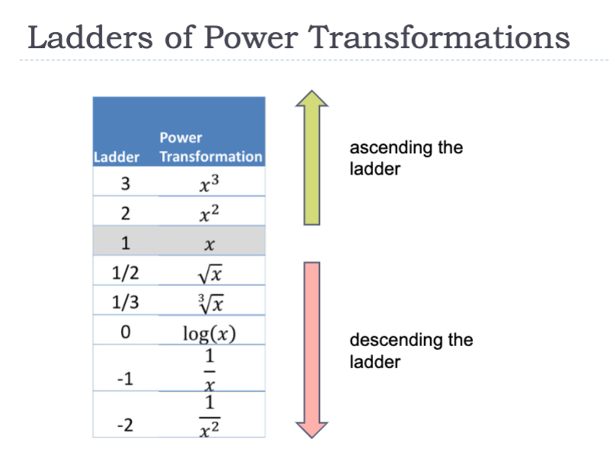

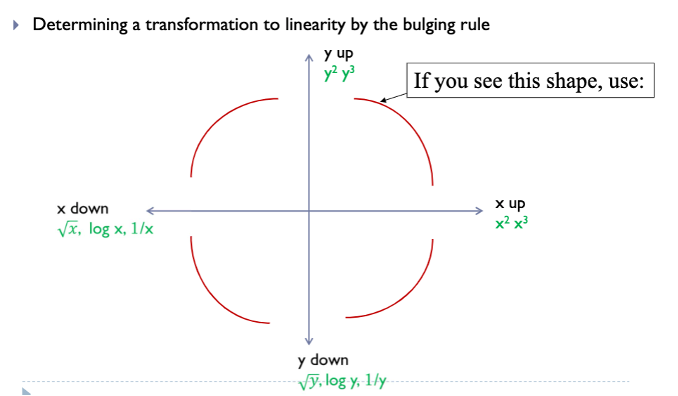

# STEP 2. SET UP CROSS-VALIDATION

Cross-validation is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.  It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

Because we have the HBAT_SPLITS data set with the HBAT data, we can merge the datasets and use the Split60 variable to filter our data.


In [ ]:
file_path = '/content/HBAT_SPLITS.sav'
# Read the HBAT_SPLITS.sav file
hbat_splits_df, hbat_meta = pyreadstat.read_sav(file_path)
# Display the first few rows of the dataframe
hbat_splits_df.head()

,id,split60,split50
0,1.0,0.0,0.0
1,2.0,0.0,0.0
2,3.0,0.0,0.0
3,4.0,0.0,1.0
4,5.0,0.0,0.0


1.	Merging Data Files

In [ ]:
merged_df = pd.merge(hbat_df, hbat_splits_df, on='id')

# Select training and testing sets based on the split60 column
train_df = merged_df[merged_df['split60'] == 0].drop(columns=['split60'])
validation_df = merged_df[merged_df['split60'] == 1].drop(columns=['split60'])

In [ ]:
# Display the training and validation datasets
print(train_df.shape)
print(validation_df.shape)

(60, 25)
(40, 25)


2.	Random Splitting Using Python

If we did not have the HBAT_SPLITS dataset, we would split the dataset into a training group and holdout group through random selection. We want to ensure that the selected cases are the same for everyone by setting a fixed seed value. Then, we can select 60% of the cases as training data, and 40% of the cases as validation data (or holdout data).

In [ ]:
from sklearn.model_selection import train_test_split

# Set a fixed seed value for reproducibility
seed = 1234567

# Split the data into 60% training and 40% validation
RS_train_df, RS_validation_df = train_test_split(hbat_df, test_size=0.4, random_state=seed)

# Display the training and validation datasets
print(RS_train_df.shape)
print(RS_validation_df.shape)

(60, 24)
(40, 24)


3.	Checking for Systematic Differences Between the Groups


Here we assess whether the patterns learned from one subset of data hold for another, revealing potential group-level biases or structural differences.

In [ ]:
import statsmodels.api as sm
# Map binary values to region names
region_mapping = {0: 'USA/North America', 1: 'Outside North America'}
train_df['Region'] = train_df['x4'].map(region_mapping)
validation_df['Region'] = validation_df['x4'].map(region_mapping)

# Calculate the frequency and percentage for each group
def calculate_frequencies(df, region_column):
    # Frequency count
    frequencies = df[region_column].value_counts()

    # Percent
    total_count = len(df)
    percentages = (frequencies / total_count) * 100

    # Valid Percent (ignoring NaNs, though this sample has no NaNs)
    valid_count = df[region_column].notna().sum()  # Number of non-missing values
    valid_percentages = (frequencies / valid_count) * 100

    # Cumulative Percent
    cumulative_percentages = valid_percentages.cumsum()

    # Combine into DataFrame
    return pd.DataFrame({
        'Frequency': frequencies,
        'Percent': percentages,
        'Valid Percent': valid_percentages,
        'Cumulative Percent': cumulative_percentages
    })


frequencies_sample_0 = calculate_frequencies(train_df, 'Region')
print("training set:")
print(frequencies_sample_0)

frequencies_sample_1 = calculate_frequencies(validation_df, 'Region')
print("\nvalidation set:")
print(frequencies_sample_1)

training set:
                       Frequency    Percent  Valid Percent  Cumulative Percent
Region                                                                        
Outside North America         34  56.666667      56.666667           56.666667
USA/North America             26  43.333333      43.333333          100.000000

validation set:
                       Frequency  Percent  Valid Percent  Cumulative Percent
Region                                                                      
Outside North America         27     67.5           67.5                67.5
USA/North America             13     32.5           32.5               100.0


Or we can use the K-Fold Cross Validationclass from sklearn.model_selection to 1) split the data into K equally sized folds, 2) train the model on K-1 folds and evaluate it on the remaining fold, 3) repeat this process K times, changing the fold used for evaluation each time, 4) aggregate the evaluation metrics (e.g., accuracy) over the K iterations.
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define features (X) and target (y) columns
X = hbat_df.loc[:, 'x6':'x18'] # Columns x6-x18 are features (X)
y = hbat_df['x4'] #(y) Columns x4 is target (y)

# Initialize the model
model = RandomForestClassifier()

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Conduct cross-validation and calculate the scores
scores = cross_val_score(model, X, y, cv=kf)

# Print scores for each fold and the average score
print("Scores for each fold:", scores)
print("Average score:", np.mean(scores))

Scores for each fold: [0.85 0.9  0.9  0.95 0.75]
Average score: 0.8699999999999999


# STEP 3: HYPOTHESES

Region of Rejection: α=0.05

1.	Logistic Regression Coefficients

$H_0: β_{Product Quality}=0$


After controlling for all other predictors, there is no relationship between Product Quality perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{E-Commerce Activities}=0$

After controlling for all other predictors, there is no relationship between E-Commerce Activities perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Technical Support}=0$

After controlling for all other predictors, there is no relationship between Technical Support perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Complaint Resolution}=0$

After controlling for all other predictors, there is no relationship between Complaint Resolution perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Advertising}=0$

After controlling for all other predictors, there is no relationship between Advertising perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Product Line}=0$

After controlling for all other predictors, there is no relationship between Product Line perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Salesforce Image}=0$

After controlling for all other predictors, there is no relationship between Salesforce Image perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Competitive Pricing}=0$

After controlling for all other predictors, there is no relationship between Competitive Pricing perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Warranty and Claims}=0$

After controlling for all other predictors, there is no relationship between Warranty & Claims perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{New Products}=0$

After controlling for all other predictors, there is no relationship between New Products perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Ordering and Billing}=0$

After controlling for all other predictors, there is no relationship between Ordering and Billing perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Price Flexibility}=0$

After controlling for all other predictors, there is no relationship between Price Flexibility perceptions and whether a customer’s location Region is in the US/North America or outside of North America.

$H_0: β_{Delivery Speed}=0$

After controlling for all other predictors, there is no relationship between Delivery Speed perceptions and whether a customer’s location Region is in the US/North America or outside of North America.



2.	Omnibus Test of Model Coefficients (Pseudo $R^2$):


*   The omnibus test of model coefficients compares the -2LL difference between the new models and the baseline model. Significant chi-square values indicate that the new model explains more variance in the dependent variable than a model with no predictors at all.
*   Model:

    $H_0$: The model does not explain more variance in the dependent variable than the baseline model.
*   Step:

    $H_0$: The model does not explain more variance in the dependent variable than the step.


3.	Hosmer and Lemeshow Test of Goodness of Fit


*   The Hosmer and Lemeshow measure is a statistical test of overall predictive accuracy based on the correspondence of actual and predicted values of the dependent variable.

 $H_0$: The model fits the data.



# STEP 4: FITTING LOGISTIC REGRESSION & ANALYSIS

1.	Univariate Tests of Each Variable


*   Test simple logistic regression models with each independent variable as the only variable will give us univariate significance tests. Repeat for all variables

In [ ]:
import statsmodels.api as sm

# List of predictor variables
predictors = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']

# Define the dependent variable (Region)
y = hbat_df['x4']

# Loop through each predictor and fit a univariate logistic regression model
for predictor in predictors:
    # Prepare the predictor variable (independent variable)
    X = sm.add_constant(hbat_df[[predictor]])  # Adding a constant (intercept) to the model

    # Fit the logistic regression model for the individual predictor
    model = sm.Logit(y, X).fit(disp=0)  # disp=0 suppresses the output

    # Print the summary for the individual predictor's logistic regression model
    print(f"Logistic Regression for {predictor}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")


Logistic Regression for x6:
                           Logit Regression Results                           
Dep. Variable:                     x4   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.2258
Time:                        19:22:20   Log-Likelihood:                -51.777
converged:                       True   LL-Null:                       -66.875
Covariance Type:            nonrobust   LLR p-value:                 3.907e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4137      1.808      4.653      0.000       4.869      11.958
x6            -0.9916      0.217     -4.560      0.000      -1.418      -0.565


Logistic Regression fo

•	The univariate tests identify five of the 13 variables (X6, X11, X12, X13, and X17) with statistically significant relationship with the dependent variable.



2.	Stepwise Model Estimation

* Estimating the Base Model

  We will use the null model as a baseline, which we will compare to later.
  
  Score Test, also known as the Lagrange Multiplier Test, is used to evaluate the significance of each individual predictor variable in the model when it is added to the model containing no other predictors. It provides a measure of how much the inclusion of a specific variable improves the fit of the model.


The Base Model: no predictors in the model

In [ ]:
from scipy import stats
y = train_df['x4']  # Replace with your actual dependent variable

# Define the list of independent variables
independent_vars = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']

# Fit the null model (intercept only)
X_null = sm.add_constant(pd.DataFrame(index=train_df.index))  # Only an intercept
null_model = sm.Logit(y, X_null).fit(disp=0)

# Prepare to store the results
results = []

# Perform the Score Test for each independent variable
for var in independent_vars:
    X = sm.add_constant(train_df[[var]])  # Model with intercept and the single predictor
    model = sm.Logit(y, X).fit(disp=0)

    # Calculate the score statistic
    score_stat = 2 * (model.llf - null_model.llf)  # Likelihood ratio statistic
    p_value = stats.chi2.sf(score_stat, df=1)  # p-value from chi-square distribution

    # Store the result
    results.append({
        'Variable': var,
        'Score': score_stat,
        'df': 1,
        'Sig.': p_value
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

   Variable      Score  df          Sig.
0        x6  12.996126   1  3.121360e-04
1        x7   2.098827   1  1.474122e-01
2        x8   1.628139   1  2.019606e-01
3        x9   0.871330   1  3.505875e-01
4       x10   0.795797   1  3.723529e-01
5       x11  21.520127   1  3.501345e-06
6       x12   9.371423   1  2.203944e-03
7       x13  25.136325   1  5.341710e-07
8       x14   0.466764   1  4.944799e-01
9       x15   0.620037   1  4.310334e-01
10      x16   0.089925   1  7.642723e-01
11      x17  27.328451   1  1.716669e-07
12      x18   0.157080   1  6.918591e-01


Based on the results, since the stepwise procedure selects the variable with the highest score statistic, X17 would be the first variable added. Stepwise estimation: adding the first variable X17.

In [ ]:
from scipy import stats
# Stepwise Estimation: Start by fitting the model with the first variable, x17
X_base = sm.add_constant(train_df[['x17']])  # Initial model with X13
base_model = sm.Logit(y, X_base).fit(disp=0)
# Prepare to store the results
results = []
independent_vars = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x18']
# Evaluate the remaining variables not in the initial model
for var in independent_vars:
    X_temp = sm.add_constant(train_df[['x17', var]])  # Model with X13 and the current variable
    temp_model = sm.Logit(y, X_temp).fit(disp=0)

    # Calculate the score statistic for the additional variable
    score_stat = 2 * (temp_model.llf - base_model.llf)  # Likelihood ratio statistic
    p_value = stats.chi2.sf(score_stat, df=1)  # p-value from chi-square distribution

    # Store the result
    results.append({
        'Variable': var,
        'Score': score_stat,
        'df': 1,
        'Sig.': p_value
    })

# Calculate overall statistics
overall_score = sum([res['Score'] for res in results])
overall_df = len(results)
overall_p_value = stats.chi2.sf(overall_score, df=overall_df)

# Append overall statistics to the results
results.append({
    'Variable': 'Overall Statistics',
    'Score': overall_score,
    'df': overall_df,
    'Sig.': overall_p_value
})

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print("Variables not in the Equation after adding X17:")
print(results_df)

Variables not in the Equation after adding X17:
              Variable      Score  df          Sig.
0                   x6   5.518732   1  1.881389e-02
1                   x7   0.069094   1  7.926599e-01
2                   x8   0.466012   1  4.948274e-01
3                   x9   9.135195   1  2.507387e-03
4                  x10   0.320853   1  5.710956e-01
5                  x11  13.458109   1  2.439495e-04
6                  x12   3.343986   1  6.745101e-02
7                  x13  14.819257   1  1.183211e-04
8                  x14   0.169388   1  6.806559e-01
9                  x15   0.004128   1  9.487722e-01
10                 x16   4.673894   1  3.062442e-02
11                 x18  12.811253   1  3.445407e-04
12  Overall Statistics  64.789903  12  2.981249e-09


Classification Table for the model with only one predictor X17.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Prepare the training set
X_train = sm.add_constant(train_df[['x17']])
y_train = train_df['x4']

# Fit the logistic regression model using the training set
model = sm.Logit(y_train, X_train).fit()

# Generate predictions for the training set
train_pred_probs = model.predict(X_train)
train_pred = np.where(train_pred_probs >= 0.5, 1, 0)

# Generate predictions for the validation set
X_validation = sm.add_constant(validation_df[['x17']])
y_validation = validation_df['x4']
validation_pred_probs = model.predict(X_validation)
validation_pred = np.where(validation_pred_probs >= 0.5, 1, 0)

# Compute the confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, train_pred)

# Compute the confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(y_validation, validation_pred)

# Calculate overall accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)

# Calculate overall accuracy for the validation set
validation_accuracy = accuracy_score(y_validation, validation_pred)

# Calculate the accuracy for each category (precision for each class)
train_category_accuracy = train_conf_matrix.diagonal() / train_conf_matrix.sum(axis=1)
validation_category_accuracy = validation_conf_matrix.diagonal() / validation_conf_matrix.sum(axis=1)

# Display the results for the training set
print("Training Set Classification Table")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Overall Percentage Correct: {train_accuracy * 100:.1f}%")
print(f"Category Accuracy: {train_category_accuracy * 100}")

# Display the results for the validation set
print("\nValidation Set Classification Table")
print(f"Confusion Matrix:\n{validation_conf_matrix}")
print(f"Overall Percentage Correct: {validation_accuracy * 100:.1f}%")
print(f"Category Accuracy: {validation_category_accuracy * 100}")

Optimization terminated successfully.
         Current function value: 0.456495
         Iterations 7
Training Set Classification Table
Confusion Matrix:
[[19  7]
 [ 7 27]]
Overall Percentage Correct: 76.7%
Category Accuracy: [73.07692308 79.41176471]

Validation Set Classification Table
Confusion Matrix:
[[ 8  5]
 [ 4 23]]
Overall Percentage Correct: 77.5%
Category Accuracy: [61.53846154 85.18518519]



* Four variables not in the current logistic model (X13, X12, X11, and X6) have large score statistics, indicating that their inclusion would significantly improve the overall model fit.  Among these four variables, X13 has the highest score statistic.
* The overall accuracy for the holdout sample is good (76.7%), one of the groups (USA/North America customers) has a predictive accuracy of 73.08 percent, outside USA has a predictive accuracy 79.41

We then consider an additional stage(s) to add variable(s) X13 to the model.

Practice Problem: Stepwise Estimation and Classification Table with adding the second variable X13

3.	Assessing Overall Model Goodness of Fit

* Omnibus Test of Model Coefficients


In [ ]:
from scipy import stats
import statsmodels.api as sm
import pandas as pd

# Define dependent variable
y = train_df['x4']  # Replace with your actual dependent variable

# Define the independent variables
X1 = train_df[['x17']]  # First variable
X2 = train_df[['x13', 'x17']]  # First and second variables (adding the second variable X13 will be covered in the practice problems)

# Add a constant to the models
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

# Fit the null model (model with only the intercept)
# Use a constant array of ones with the same length as 'y' for the null model
null_model = sm.Logit(y, sm.add_constant(pd.DataFrame({'const': np.ones(len(y))}, index=y.index))).fit(disp=0)

# Fit the models with the independent variables
model_1 = sm.Logit(y, X1).fit(disp=0)
model_2 = sm.Logit(y, X2).fit(disp=0)

# Calculate the Omnibus Test (likelihood ratio test)
# Comparing model with x13 to the null model
lr_stat_1 = 2 * (model_1.llf - null_model.llf)
df_1 = model_1.df_model - null_model.df_model
p_value_1 = stats.chi2.sf(lr_stat_1, df_1)

print(f"Omnibus Test for X17:")
print(f"Chi-Square Statistic: {lr_stat_1:.4f}, df: {df_1}, p-value: {p_value_1:.4f}")

# Comparing model with x13 and x17 to the null model
lr_stat_2 = 2 * (model_2.llf - null_model.llf)
df_2 = model_2.df_model - null_model.df_model
p_value_2 = stats.chi2.sf(lr_stat_2, df_2)

print(f"\nOmnibus Test for X17 and X13:")
print(f"Chi-Square Statistic: {lr_stat_2:.4f}, df: {df_2}, p-value: {p_value_2:.4f}")

# Calculate the likelihood ratio test between model_2 and model_1
lr_stat = 2 * (model_2.llf - model_1.llf)  # Likelihood ratio statistic
df_diff = model_2.df_model - model_1.df_model  # Difference in degrees of freedom
p_value = stats.chi2.sf(lr_stat, df_diff)  # p-value from chi-square distribution

# Display the result
print(f"\nLikelihood Ratio Test between model_1 (X17) and model_2 (X17 + X13):")
print(f"Chi-Square Statistic: {lr_stat:.4f}, df: {df_diff}, p-value: {p_value:.4f}")

Omnibus Test for X17:
Chi-Square Statistic: 27.3285, df: 1.0, p-value: 0.0000

Omnibus Test for X17 and X13:
Chi-Square Statistic: 42.1477, df: 2.0, p-value: 0.0000

Likelihood Ratio Test between model_1 (X17) and model_2 (X17 + X13):
Chi-Square Statistic: 14.8193, df: 1.0, p-value: 0.0001


The final model (X13 & X17) has a chi-square value of 42.148 with a p-value less 0.001. This is less than alpha = 0.05, therefore we reject the null hypothesis and conclude that this model is statistically significantly better than the baseline.

For the step, the final model has a chi-square of 14.819 with a p-value less than 0.001. This indicates that the final model is significantly better than the one variable model. In other words, this step explains significantly more variance in region than the one variable model.


•	Pseudo $R^2$ Measures (practical Significance)

In [ ]:
# Calculate -2LL for each model
minus_2LL_1 = -2 * model_1.llf
minus_2LL_2 = -2 * model_2.llf

# Calculate Cox & Snell R²
n = len(y)
cox_snell_r2_1 = 1 - np.exp((model_1.llnull - model_1.llf) * 2 / n)
cox_snell_r2_2 = 1 - np.exp((model_2.llnull - model_2.llf) * 2 / n)

# Calculate Nagelkerke R²
nagelkerke_r2_1 = cox_snell_r2_1 / (1 - np.exp(model_1.llnull * 2 / n))
nagelkerke_r2_2 = cox_snell_r2_2 / (1 - np.exp(model_2.llnull * 2 / n))

# Refer to the paper https://web.pdx.edu/~newsomj/cdaclass/ho_logistic.pdf (page 6)
# for detailed explanations and formulas for Cox & Snell R² and Nagelkerke R² in logistic regression.

# Summarize the results
summary = pd.DataFrame({
    'Step': [1, 2],
    '-2 Log likelihood': [minus_2LL_1, minus_2LL_2],
    'Cox & Snell R Square': [cox_snell_r2_1, cox_snell_r2_2],
    'Nagelkerke R Square': [nagelkerke_r2_1, nagelkerke_r2_2]
})

# Display the summary
print(summary)

   Step  -2 Log likelihood  Cox & Snell R Square  Nagelkerke R Square
0     1          54.779361              0.365853             0.490747
1     2          39.960104              0.504636             0.676907


The Cox and Snell and the Nagelkerke. Both measures are based on the -2LL reduction. When interpreting, the Cox and Snell $R^2$ value approaches 1, whereas the Nagelkerke is interpreted on a scale of 0 to 1. So, many researchers prefer the Nagelkerke $R^2$ value.

The Cox and Snell $R^2$ value was 0.505 and the Nagelkerke $R^2$ value was 0.677.

These pseudo $R^2$ technically indicate the proportion of variation of dependent variable accounted for by the predictors.

We can say that this model accounts for at least one-half of the variation between US/North America and Non-US/North America Regions. These values are acceptable as practically significant and indicate good model fit.


X17 was selected for entry in the first step of the estimation process, It corresponded to the highest score statistic across all perception variables. The first model provides us with significant results to the Hosmer and Lemeshow Test.

X13, with the highest score statistic after adding X17, was selected for entry at step 2. Improvement in all measures of model fit ranged from a decrease in the -2LL value to the various $R^2$ measures.


In [ ]:
def hosmer_lemeshow_test(model, groups=10):
    # Get predicted probabilities
    predicted_probs = model.predict()

    # Create bins for the predicted probabilities
    df_hl = pd.DataFrame({'y': y, 'predicted': predicted_probs})
    df_hl['decile'] = pd.qcut(df_hl['predicted'], groups, labels=False)

    # Calculate observed and expected frequencies
    observed = df_hl.groupby('decile')['y'].sum()
    expected = df_hl.groupby('decile')['predicted'].sum()
    total = df_hl.groupby('decile').size()

    # Calculate the Hosmer-Lemeshow Chi-Square statistic
    hl_stat = ((observed - expected) ** 2 / (expected * (1 - expected / total))).sum()

    # Degrees of freedom (df = groups - 2)
    df = groups - 2

    # P-value
    p_value = stats.chi2.sf(hl_stat, df)

    return hl_stat, df, p_value

# Refer to the link https://en.wikipedia.org/wiki/Hosmer%E2%80%93Lemeshow_test#:~:text=The%20key%20concept%20of%20the,to%20create%20approximately%2010%20groups.
# for detailed explanations and formula for Hosmer-Lemeshow Statistic.

# Perform the test for each model
hl_stat_1, df_1, p_value_1 = hosmer_lemeshow_test(model_1)
hl_stat_2, df_2, p_value_2 = hosmer_lemeshow_test(model_2)

# Display the results
print(f"Hosmer-Lemeshow Test for Model 1 (X17):")
print(f"Chi-Square: {hl_stat_1:.3f}, df: {df_1}, p-value: {p_value_1:.3f}\n")

print(f"Hosmer-Lemeshow Test for Model 2 (X17 + X13):")
print(f"Chi-Square: {hl_stat_2:.3f}, df: {df_2}, p-value: {p_value_2:.3f}")

Hosmer-Lemeshow Test for Model 1 (X17):
Chi-Square: 10.139, df: 8, p-value: 0.255

Hosmer-Lemeshow Test for Model 2 (X17 + X13):
Chi-Square: 4.398, df: 8, p-value: 0.820


The Hosmer and Lemeshow test shows chi-square value of 10.139,p-value for the one-variable model is 0.255. The two-variable model was not significant, indicating good fit for the data with chi-square value of 4.398 and p-value is 0.820.

4.	Interpretation of Coefficients

In [ ]:
def extract_model_statistics(model):
    params = model.params
    conf = model.conf_int()
    conf['OR'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'OR']
    OR = np.exp(conf['OR'])
    conf['OR Lower'] = np.exp(conf['Lower CI'])
    conf['OR Upper'] = np.exp(conf['Upper CI'])

    wald = (params / model.bse) ** 2
    p_values = model.pvalues

    results = pd.DataFrame({
        'B': params,
        'S.E.': model.bse,
        'Wald': wald,
        'df': np.ones_like(wald),  # degrees of freedom is 1 for each variable
        'Sig.': p_values,
        'Exp(B)': OR,
        '95% C.I. Lower': conf['OR Lower'],
        '95% C.I. Upper': conf['OR Upper']
    })

    return results

# Extract and print statistics for each step
print("Step 1: Variables in the Equation x17")
extract_model_statistics(model_1)

Step 1: Variables in the Equation x17


,B,S.E.,Wald,df,Sig.,Exp(B),95% C.I. Lower,95% C.I. Upper
const,-7.822783,2.209122,12.539581,1.0,0.000398,0.000401,0.000005,0.030410
x17,1.932378,0.536982,12.949842,1.0,0.000320,6.905910,2.410688,19.783398


In [ ]:
print("\nStep 2: Variables in the Equation X13 and X17")
extract_model_statistics(model_2)


Step 2: Variables in the Equation X13 and X17


,B,S.E.,Wald,df,Sig.,Exp(B),95% C.I. Lower,95% C.I. Upper
const,-14.191731,3.712324,14.614330,1.0,0.000132,6.864513e-07,4.749781e-10,0.000992
x13,1.079107,0.357430,9.114812,1.0,0.002535,2.942050e+00,1.460177e+00,5.927816
x17,1.843935,0.638830,8.331437,1.0,0.003896,6.321363e+00,1.807329e+00,22.109769


*Competitive Pricing*

In the final model Competitive Pricing has a Wald statistic of 9.115 and a  p-value = 0.003, which is less than alpha at the 0.05 level.

We reject the null hypothesis and conclude that after controlling for all other predictors there is a relationship between Competitive Pricing perception and whether customer’s location Region is the US/North America region vs outside of North America.

The estimated coefficient of 1.079 indicates that for each increase in competitive pricing perception (range 0 - 10), the log odds of a customer being from outside of North America rather than the USA/North America increases by 1.079.

To make this more meaningful, we must translate this from log odds to odds by using exp(1.079). Python provides this for us in the Exp(B) column—the value is 2.942. This means that a unit increase of competitive pricing perception increases the odds of the customer being from outside of North America rather than the USA/North America 2.942 folds.

To understand this in terms of percentage change in odds we will subtract 1 from this number (percentage change in odds =$e^{coefficient} -1$. In this case 2.942-1=1.942. This means that an increase in one unit of competitive pricing perception increases the odds of the customer being from outside of North America rather than the USA/North America increases by 194%. This means that the magnitude is essentially doubled.



*Price Flexibility*

In the final model Price Flexibility has a Wald statistic of 8.331 and a  p-value = 0.004, which is less than alpha at the 0.05 level.

We reject the null hypothesis and conclude that after controlling for all other predictors there is a relationship between Price Flexibility perception and whether an individual is from the US/North America region vs Outside of North America.

The estimated coefficient of 1.844 indicates that for each increase in Price Flexibility perception (range 0 - 10), the log odds of a customer location Region being outside of North America than the USA/North America increases by 1.844.

When translating this from log odds to odds, a unit increase of price flexibility increases the odds of the customer’s location region being outside of North America rather than USA/North America 6.321 folds. In other words, an increase in one unit of price flexibility perception increases the odds of the customer’s location region being outside of North America rather than the USA/North America by 531%.

*Final Model Equation*
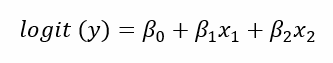

Logit (y)= -14.192+ 1.079 (Competitive Pricing )+ 1.844(Price Flexibility)


5.	Classification Accuracy

Classification accuracy is the best way to determine the validity of a training / holdout sample. To determine the predictive accuracy of the model we will assess the percentage of cases that were correctly classified, also known as the hit ratio. In logistic regression this is often just referred to as accuracy.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Prepare the training set
X_train = sm.add_constant(train_df[['x17','x13']])
y_train = train_df['x4']

# Fit the logistic regression model using the training set
model = sm.Logit(y_train, X_train).fit()

# Generate predictions for the training set
train_pred_probs = model.predict(X_train)
train_pred = np.where(train_pred_probs >= 0.5, 1, 0)

# Generate predictions for the validation set
X_validation = sm.add_constant(validation_df[['x17','x13']])
y_validation = validation_df['x4']
validation_pred_probs = model.predict(X_validation)
validation_pred = np.where(validation_pred_probs >= 0.5, 1, 0)

# Compute the confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, train_pred)

# Compute the confusion matrix for the validation set
validation_conf_matrix = confusion_matrix(y_validation, validation_pred)

# Calculate overall accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)

# Calculate overall accuracy for the validation set
validation_accuracy = accuracy_score(y_validation, validation_pred)

# Calculate the accuracy for each category (precision for each class)
train_category_accuracy = train_conf_matrix.diagonal() / train_conf_matrix.sum(axis=1)
validation_category_accuracy = validation_conf_matrix.diagonal() / validation_conf_matrix.sum(axis=1)

# Extract the confusion matrix values
tn_train, fp_train = train_conf_matrix[0]  # True Negatives, False Positives
fn_train, tp_train = train_conf_matrix[1]  # False Negatives, True Positives

tn_validation, fp_validation = validation_conf_matrix[0]
fn_validation, tp_validation = validation_conf_matrix[1]

# Creating the DataFrame
data = {
    'Observed': ['US/North America', 'Rest of the World'],
    'US/North America (Training)': [tn_train, fn_train],
    'Rest of the World (Training)': [fp_train, tp_train],
    'US/North America (Holdout)': [tn_validation, fn_validation],
    'Rest of the World (Holdout)': [fp_validation, tp_validation]
}

classification_table = pd.DataFrame(data)

# Add the accuracy percentages to the DataFrame
classification_table['Training Accuracy %'] = [f"{train_category_accuracy[0] * 100:.1f}%",
                                               f"{train_category_accuracy[1] * 100:.1f}%"]
classification_table['Holdout Accuracy %'] = [f"{validation_category_accuracy[0] * 100:.1f}%",
                                              f"{validation_category_accuracy[1] * 100:.1f}%"]

# Display the classification table with accuracy
classification_table

Optimization terminated successfully.
         Current function value: 0.333001
         Iterations 8


,Observed,US/North America (Training),Rest of the World (Training),US/North America (Holdout),Rest of the World (Holdout),Training Accuracy %,Holdout Accuracy %
0,US/North America,25,1,9,4,96.2%,69.2%
1,Rest of the World,6,28,2,25,82.4%,92.6%


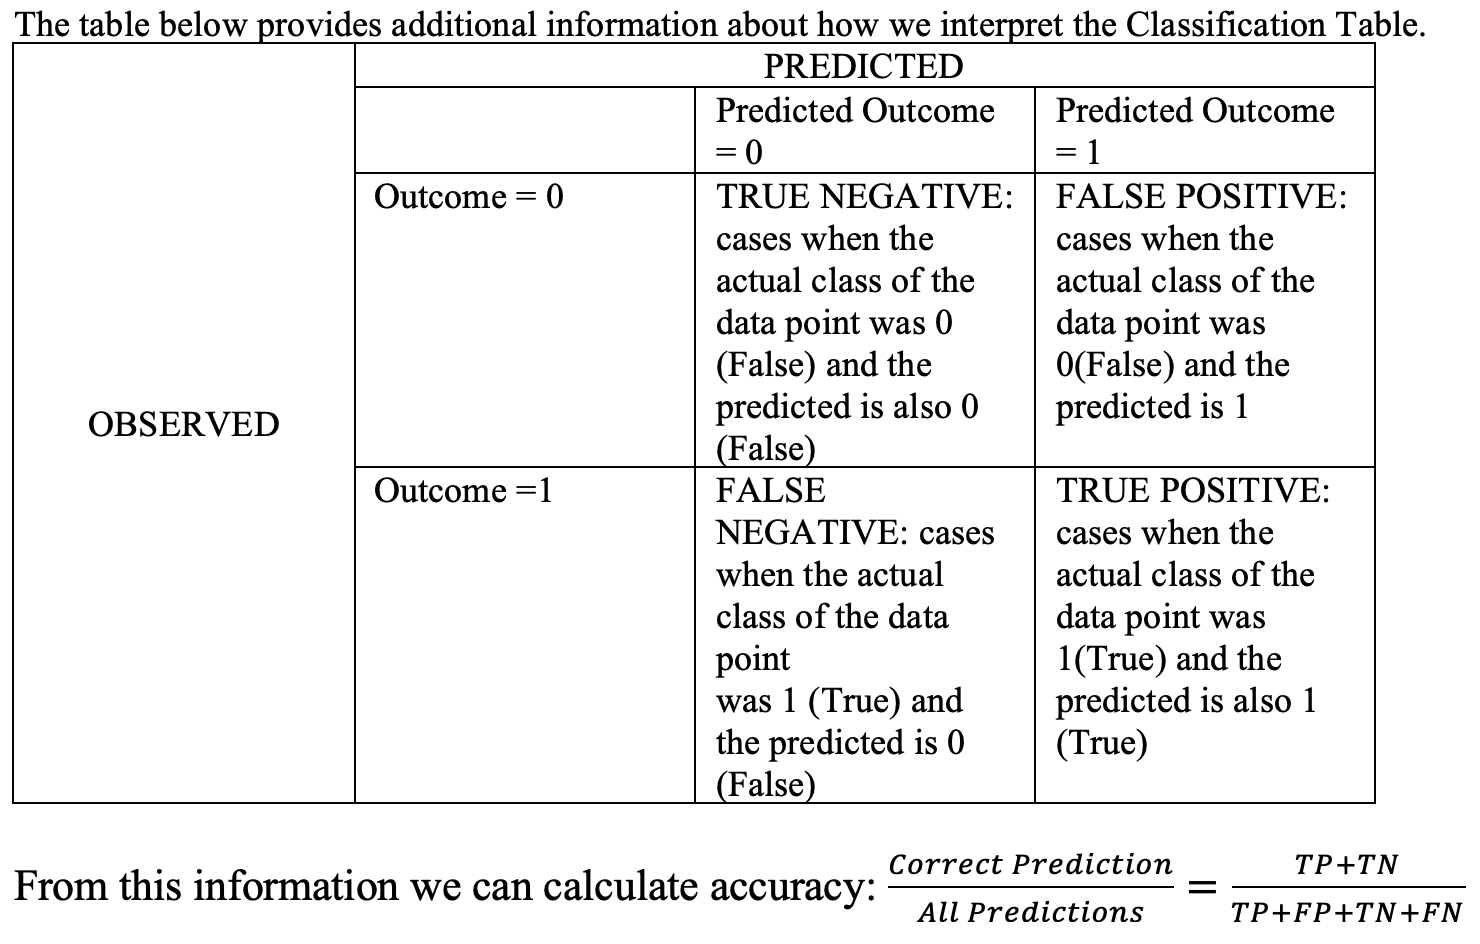

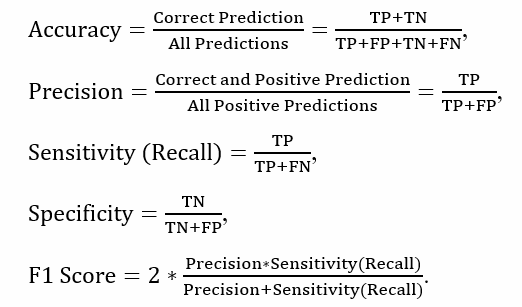


Accuracy: it measures how close a measured or predicted value is to the actual or true value. It refers to the proportion of correctly classified instances out of all instances. Accuracy can be misleading in imbalanced datasets.

Precision: it measures how many of the predicted positive cases are actually correct. It refers to the fraction of relevant instances among the retrieved instances.


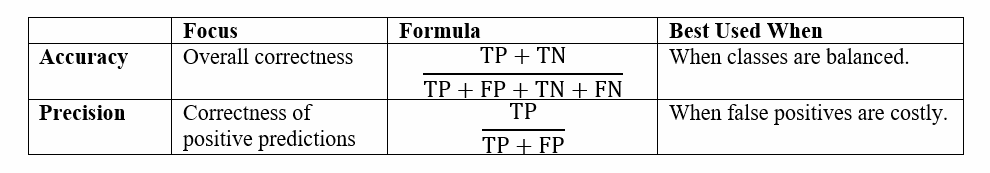

*Sensitivity and Specificity*

Sensitivity (recall) and specificity provide a means to understand the trade-offs between false positives and false negatives for any specific cut-off value. Increasing sensitivity works toward minimizing false negatives, and specificity does the same for false positives.

Sensitivity(recall): proportion of subjects actually had a positive outcome (1) was predicted by the algorithm as having positive outcomes (1). In ROC, we will call this the true positive rate.

Sensitivity=TP/(TP+FN)



*   For Training Data: Sensitivity=28/(28+6)  = 82.4%
*   For Validation Data: Sensitivity=25/(25+2)  = 92.6%




Specificity: proportion of subjects with outcome 0 were predicted by the model to have outcome 0. 1- Specificity is referred to as the false positive rate in ROC analysis.

Specificity=TN/(TN+FP)


*   For Training Data: Specificity=25/(25+1)=96.2%
*   For Validation Data: Specificity=9/(9+4)=69.2%

***ROC Curve***

When you consider the results of a test in two populations, one population with outcome 1, the other population with outcome 0, you will rarely observe a perfect separation between the two groups; instead there will be some overlap or a gradient.  

ROC Curve Analysis assesses the accuracy of the model beyond hit ratios by indicating how much the model can discriminate between the two levels of the dependent variable. The ROC curve plots sensitivity (probability of predicting a true positive) and 1-specificity (probability of predicting a negative will be a positive, or a false-positive), which shows the relationship between sensitivity and specificity.

The ROC curve is a graph with:

* The x-axis showing 1- specificity (= false positive fraction = FP/(FP+TN))
* The y-axis showing sensitivity (= true positive fraction = TP/(TP+FN))

The area under ROC curve indicates the test's discriminative ability.

To interpret the ROC figure, the closer the curve is to a diagonal line, the worse it is at discriminating between positives and negatives. Ideally, we would observe an ROC curve that is close to the top left hand corner of the graph. The higher it is, the better it is at distinguishing between the two categories.


***Guidelines for Interpreting ROC Curve***

The diagonal line across the ROC curve represents a null model, a model predicting equally to chance. This line represents the lower bound of acceptability. This would result in a high true positive rate and low false negative rate. We will additionally use the Area Under the Curve (AUC) test.


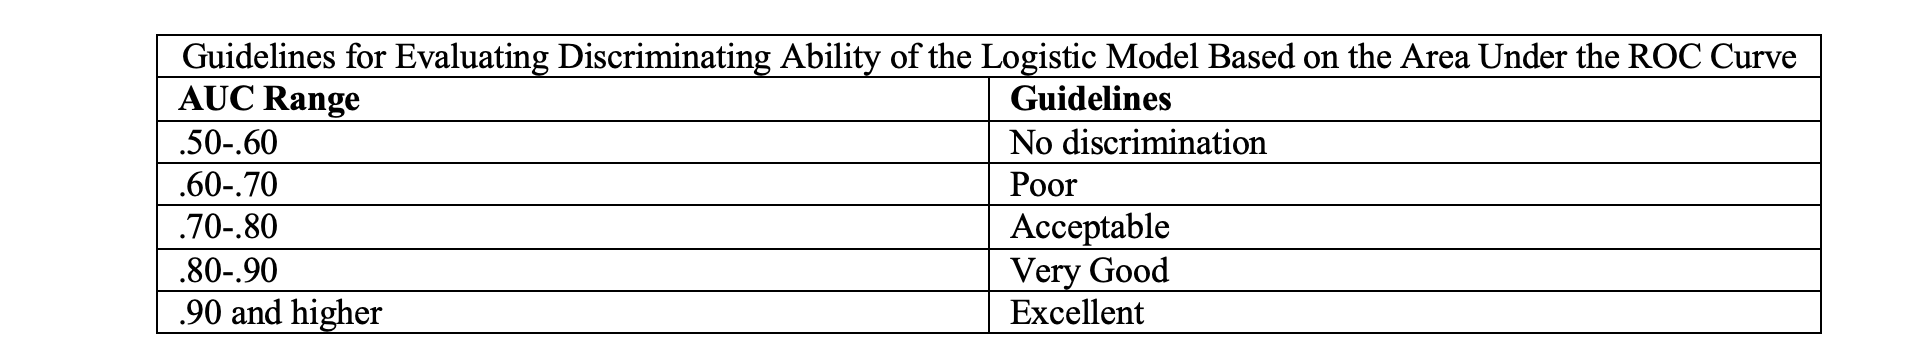

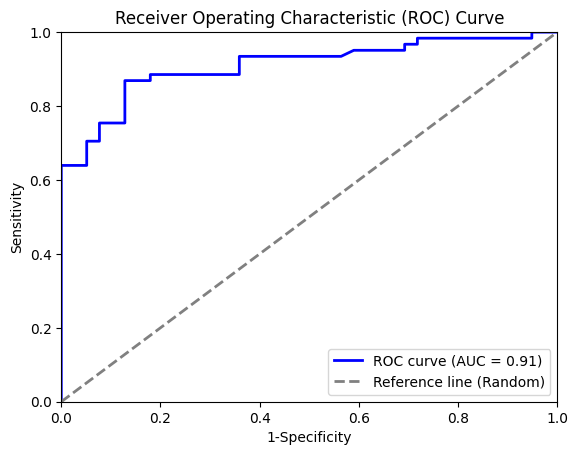

Standard Error (SE) of AUC: 0.0287
 Area Std. Error Asymptotic Sig. Lower Bound Upper Bound
0.909      0.029           0.000       0.853       0.966


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract the binary outcome
# y_true = y_train
# y_scores = model.predict(X_train)
y_true = hbat_df['x4']
y_scores = model.predict(sm.add_constant(hbat_df[['x17','x13']]))

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Reference line (Random)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute the standard error for AUC
se_auc = np.sqrt((roc_auc * (1 - roc_auc)) / len(y_true))
print(f'Standard Error (SE) of AUC: {se_auc:.4f}')

# Calculate the standard error (SE) for AUC
n1 = sum(y_true)  # Number of positive cases
n2 = len(y_true) - n1  # Number of negative cases
q1 = roc_auc / (2 - roc_auc)
q2 = 2 * roc_auc**2 / (1 + roc_auc)
se_auc = np.sqrt((roc_auc * (1 - roc_auc) + (n1 - 1) * (q1 - roc_auc**2) + (n2 - 1) * (q2 - roc_auc**2)) / (n1 * n2))

# Calculate the 95% confidence interval (CI) for AUC
alpha = 0.95
z = norm.ppf(1 - (1 - alpha) / 2)
ci_lower = roc_auc - z * se_auc
ci_upper = roc_auc + z * se_auc

# Calculate the p-value (testing the null hypothesis: true AUC = 0.5)
z_auc = (roc_auc - 0.5) / se_auc
p_value = norm.sf(abs(z_auc)) * 2  # Two-tailed test

# Create a table to display the results
results_table = pd.DataFrame({
    'Metric': ['Area', 'Std. Error', 'Asymptotic Sig.', 'Lower Bound', 'Upper Bound'],
    'Value': [f"{roc_auc:.3f}", f"{se_auc:.3f}", f"{p_value:.3f}", f"{ci_lower:.3f}", f"{ci_upper:.3f}"]
})

# Display the table
transposed_results = results_table.set_index('Metric').transpose()
print(transposed_results.to_string(index=False))

Visually, if we look at the ROC curve, we see it is in the upper left hand corner and far from our reference line. From this it looks to do a good job of discriminating between true positives and false negatives. If we look at the area under the curve, we obtain a value of 0.91. Based on our guidelines table above, our logistic model has “excellent” discriminating ability.

*Conclusion of Analysis *

Binary logistic regression was used to determine whether differences in the perceptions of HBAT exist between the customers in the USA/North America vs the rest of the world. Prior to model estimation, 40% of the sample (n=40) were saved for validation and was not used in model building. The predictor variables in this study were determined stepwise: a full model with all potential predictors was estimated and scores for each predictor based on improvement on the baseline model was compared to select variables with the greatest relevance. X13 competitive pricing metric and X17 price flexibility are shown to be the two major aspects where customers in the USA/North America perceived differently from the rest of the world.

Overall, the two predictor model provided a statistically significant classification of customer region ($χ^2$=42.148, p value<.0001). The Nagelkerke pseudo $R^2$ indicated that the model accounted for approximately 67.7% of the total variances. Classification accuracies based on a cutoff of .500 are 88.3% and 85% for training and validation set respectively from lab practice results. These are higher than the 'no information rate' when no predictor was in the model (56.7% and 67.5%) and we can conclude that the inclusion of competitive pricing and price flexibility helped us better distinguish between customers who reside within and outside North America.


# STEP 5: CASEWISE DIAGNOSTICS

In an effort of improving the model, we can look at the misclassifications of individual observations. We will do this by looking at outliers from the model.

At 3 standard errors there are no outliers. However, if we look at 2 standard errors we have three cases: 3, 43, and 64. These findings indicate that these cases could be examined for possible data errors or even exclusion if it was found to not be representative of the USA/North American cases. Given the low levels of misclassification, however, none of the cases are eliminated from the analysis (Hair, 2019).


In [ ]:
y = hbat_df['x4']
X = sm.add_constant(hbat_df[['x17','x13']])
predicted_probs = model.predict(X)
predicted_classes = np.where(predicted_probs >= 0.5, 1, 0)
# Calculate residuals (Observed - Predicted)
residuals = y - predicted_probs
# Calculate hat values (leverage)
X_array = X.to_numpy()
hat_matrix_diag = np.diag(X_array @ np.linalg.inv(X_array.T @ X_array) @ X_array.T)
# diag(H)=diag(X(X'X)^(−1)X')
# Calculate Standardized Residuals
standardized_residuals = residuals/np.std(residuals)
# Calculate studentized residuals (SResid)
studentized_residuals = standardized_residuals / np.sqrt(1 - hat_matrix_diag)
# Identify outliers
outliers = np.abs(standardized_residuals) > 2

# Create lists of zresid and sresid, filling with None for missing values
zresid_list = standardized_residuals.tolist()
# Extend sresid_list to match the length of other lists
sresid_list = studentized_residuals.tolist()
# Create a DataFrame to list these cases
casewise_list = pd.DataFrame({
    'Case': hbat_df['id'],
    'Selected Status': ['S']*len(hbat_df['id']),
    'Observed': y.tolist(),
    'Predicted': predicted_probs.tolist(),
    'Predicted Group': predicted_classes.tolist(),
    'Resid': residuals.tolist(),
    'ZResid': zresid_list,  # Use the filled list
    'SResid': sresid_list   # Use the filled list
})

# Filter out the cases with studentized residuals greater than 2
# Note: We need to filter based on non-null 'ZResid' values
outliers_list = casewise_list[casewise_list['ZResid'].abs() > 2]

# Display the outliers list
outliers_list

,Case,Selected Status,Observed,Predicted,Predicted Group,Resid,ZResid,SResid
2,3.0,S,1.0,0.123466,0,0.876534,2.510328,2.557701
12,13.0,S,0.0,0.909471,1,-0.909471,-2.604655,-2.621342
21,22.0,S,1.0,0.021797,0,0.978203,2.801500,2.859679
41,42.0,S,0.0,0.963680,1,-0.963680,-2.759906,-2.793453
42,43.0,S,0.0,0.906849,1,-0.906849,-2.597148,-2.611572
63,64.0,S,1.0,0.143678,0,0.856322,2.452441,2.484879
77,78.0,S,0.0,0.963680,1,-0.963680,-2.759906,-2.793453
88,89.0,S,0.0,0.936658,1,-0.936658,-2.682519,-2.714075
93,94.0,S,1.0,0.158730,0,0.841270,2.409333,2.452666


To test the model more, we would remove these values and see the model improves.  If we wanted to remove these values we would create a new variable “outlier” with 2 levels 0 = outlier and 1= not an outlier.

In [ ]:
outliers_cases = outliers_list['Case'].tolist()
# Filter out the outliers
filtered_data = hbat_df[~hbat_df['id'].isin(outliers_cases)]
# Define predictors and target variable
X = filtered_data[['x17', 'x13']]
X = sm.add_constant(X)  # Add constant to the model
y = filtered_data['x4']

# Fit the logistic regression model on the filtered data
model = sm.Logit(y, X).fit(disp=0)

# Print the summary of the model
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                     x4   No. Observations:                   91
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.8162
Time:                        19:22:23   Log-Likelihood:                -11.055
converged:                       True   LL-Null:                       -60.138
Covariance Type:            nonrobust   LLR p-value:                 4.827e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.7418     17.677     -2.701      0.007     -82.388     -13.096
x17            5.6636      2.272      2.493      0.013       1.210      10.117
x13            3.9743      1.500      2.650      0.0

# STEP 6: PREDICTION

In addition to explanation Hair et al. (2018) describes prediction as a second purpose of using logistic regression. The goal of prediction is not a specific metric value, like in multiple regression, but instead a method of placing each observation into a distinct category/group.

We can think of a scenario where HBAT’s competitors have collected data similar to what we have in our dataset. We know they at least have collected information about the perceptions of price flexibility and product quality. HBAT is looking expand their market, but are interested in where to allocate resources (particularly where in the world). Using the information from the competitor survey, we will predict the probability of the customer location region being in USA/North America or outside of North America.

Information that we know about Customer X:

* Price Flexibility: 3.7
*	Product Quality: 6.4

Logit (y )= -14.192+ 1.079 (Competitive Pricing )+ 1.844(Price Flexibility)

Logit (y )= -14.192+ 1.079 (8.4)+ 1.844(3.7)
=1.694

To calculate the probability based on this logit, we will use the following equation:$
e^{logit}/(1+e^{logit} )=e^{1.694}/(1+e^{1.694} )$=  .85

We can predict that Customer X has an 85% chance of its region being located not in the US/North America.

Customer X is actually observation ID =84 of our data set. If we look at their true region, we can see that their location is outside of North America, we correctly predicted this.




In [ ]:
print(hbat_df.iloc[83])

id     84.0
x1      1.0
x2      1.0
x3      0.0
x4      1.0
x5      0.0
x6      6.4
x7      3.2
x8      6.7
x9      3.6
x10     2.2
x11     2.9
x12     5.0
x13     8.4
x14     7.3
x15     6.5
x16     2.0
x17     3.7
x18     1.6
x19     5.0
x20     5.1
x21     6.5
x22    37.1
x23     0.0
Name: 83, dtype: float64
